# Generate a random graph for testing the Dirichlet pagerank

In [33]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
from networkx.readwrite import json_graph
import json
import random

## Creating a graph
Create a random small-world graph

In [48]:
G = nx.connected_watts_strogatz_graph(100, 8, 0.2)

In [49]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 100\nNumber of edges: 400\nAverage degree:   8.0000'

In [50]:
nx.degree_histogram(G)

[0, 0, 0, 0, 0, 0, 7, 29, 32, 23, 7, 2]

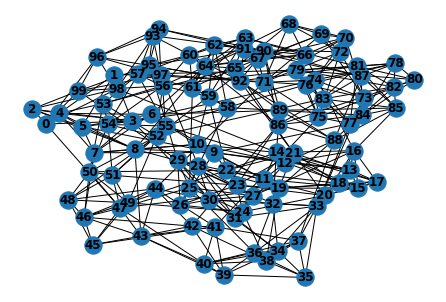

In [51]:
# plt.subplot(121)
# nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)
nx.draw_spring(G, 
#               nlist=[range(5, 10), range(5)], 
              with_labels=True, font_weight='bold')

## Make the graph directed, with the same number of edges.

In [52]:
Gd = G.to_directed()
nx.info(Gd)

'Name: \nType: DiGraph\nNumber of nodes: 100\nNumber of edges: 800\nAverage in degree:   8.0000\nAverage out degree:   8.0000'

In [53]:
nx.algorithms.components.is_strongly_connected(Gd)

True

In [57]:
Hd = Gd.copy()
while Hd.number_of_edges() > 600:
    es = [e for e in Hd.edges]
    er = random.choice(es)
    Hd.remove_edges_from([er])
    if not nx.algorithms.components.is_strongly_connected(Hd):
        Hd.add_edges_from([er])
nx.info(Hd), nx.info(Gd), nx.algorithms.components.is_strongly_connected(Hd)

('Name: \nType: DiGraph\nNumber of nodes: 100\nNumber of edges: 600\nAverage in degree:   6.0000\nAverage out degree:   6.0000',
 'Name: \nType: DiGraph\nNumber of nodes: 100\nNumber of edges: 800\nAverage in degree:   8.0000\nAverage out degree:   8.0000',
 True)

In [58]:
while Hd.number_of_edges() > 300:
    es = [e for e in Hd.edges]
    er = random.choice(es)
    Hd.remove_edges_from([er])
    if not nx.algorithms.components.is_connected(Hd.to_undirected(as_view=True)):
        Hd.add_edges_from([er])
(nx.info(Hd), nx.info(Gd), 
 nx.algorithms.components.is_strongly_connected(Hd), 
 nx.algorithms.components.is_connected(Hd.to_undirected(as_view=True))
)

('Name: \nType: DiGraph\nNumber of nodes: 100\nNumber of edges: 300\nAverage in degree:   3.0000\nAverage out degree:   3.0000',
 'Name: \nType: DiGraph\nNumber of nodes: 100\nNumber of edges: 800\nAverage in degree:   8.0000\nAverage out degree:   8.0000',
 False,
 True)

In [59]:
nx.degree_histogram(Hd)

[0, 0, 4, 9, 12, 17, 17, 18, 12, 5, 4, 1, 1]

In [60]:
nx.degree_histogram(Gd)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 29, 0, 32, 0, 23, 0, 7, 0, 2]

## Write the graph to a `json` file.

In [61]:
jd = json_graph.adjacency_data(Hd)
with open('sample-graph.json', 'w') as f:
    f.write(json.dumps(jd))

Red the graph back in like this:

In [62]:
with open('sample-graph.json') as f:
    jd2 = json.load(f)
H = json_graph.adjacency_graph(jd2)

In [63]:
nx.info(H)

'Name: \nType: DiGraph\nNumber of nodes: 100\nNumber of edges: 300\nAverage in degree:   3.0000\nAverage out degree:   3.0000'

In [64]:
nx.degree_histogram(H)

[0, 0, 4, 9, 12, 17, 17, 18, 12, 5, 4, 1, 1]

In [65]:
nx.is_isomorphic(Hd, H)

True